In [356]:
import openpyxl as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date
%matplotlib inline
import seaborn as sns
sns.set()

In [357]:
datos = pd.read_excel('bike_train.xlsx')

In [358]:
datos.insert(2, 'FechaNumero',datos['dteday'].map(date.toordinal))

In [359]:
datos

,instant,dteday,FechaNumero,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11995,2012-05-19,734642,2,1,5,23,0,6,0,1,0.60,0.6212,0.56,0.1642,71,168,239
11995,11996,2012-05-20,734643,2,1,5,0,0,0,0,1,0.58,0.5455,0.53,0.1045,42,128,170
11996,11997,2012-05-20,734643,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000,28,102,130
11997,11998,2012-05-20,734643,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000,36,62,98


In [360]:
corr = datos.corr()

In [361]:
corr

,instant,FechaNumero,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999990,0.118039,0.777284,0.167195,-0.007446,0.008323,0.007103,0.005295,-0.015359,0.029297,0.042490,-0.013275,-0.029001,0.115768,0.238546,0.229814
FechaNumero,0.999990,1.000000,0.119277,0.776468,0.168474,-0.009457,0.008254,0.007121,0.005410,-0.015217,0.030437,0.043644,-0.012197,-0.029317,0.115635,0.238038,0.229357
season,0.118039,0.119277,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.119043,0.093595,0.111369
yr,0.777284,0.776468,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.053371,0.171910,0.156960
mnth,0.167195,0.168474,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.078563,0.061686,0.073431
hr,-0.007446,-0.009457,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.285182,0.381933,0.396698
holiday,0.008323,0.008254,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,0.022140,-0.044534,-0.030304
weekday,0.007103,0.007121,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.023687,0.019179,0.022618
workingday,0.005295,0.005410,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,-0.298241,0.134789,0.025132
weathersit,-0.015359,-0.015217,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.147903,-0.130223,-0.149848


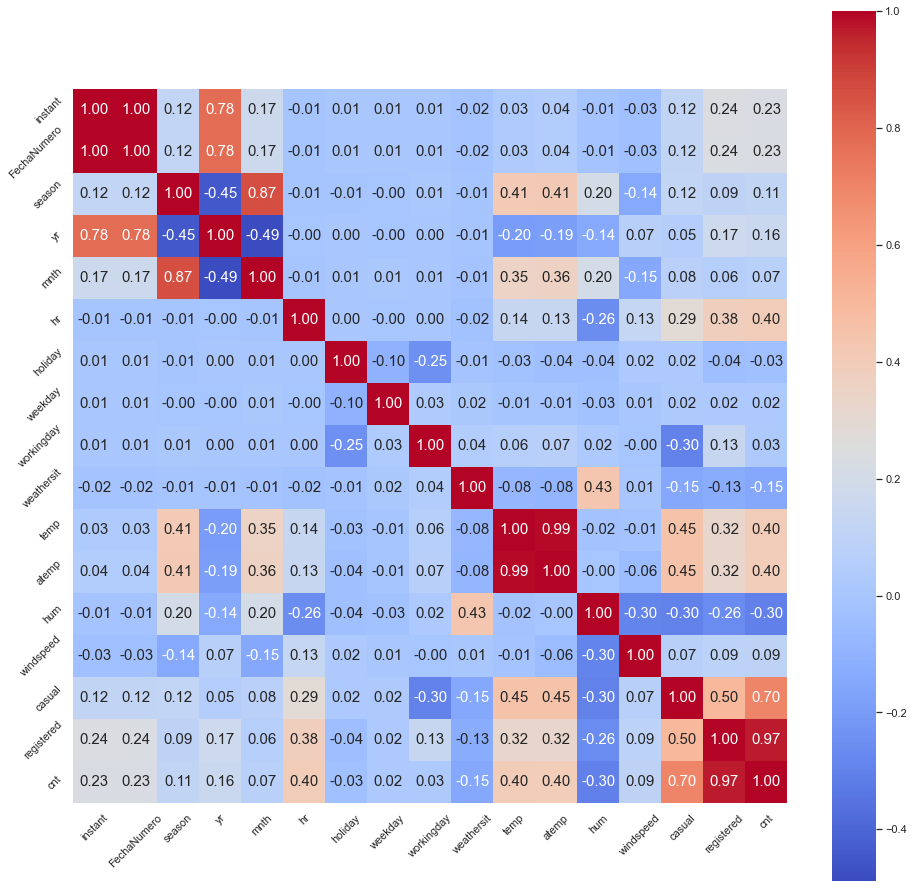

In [362]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

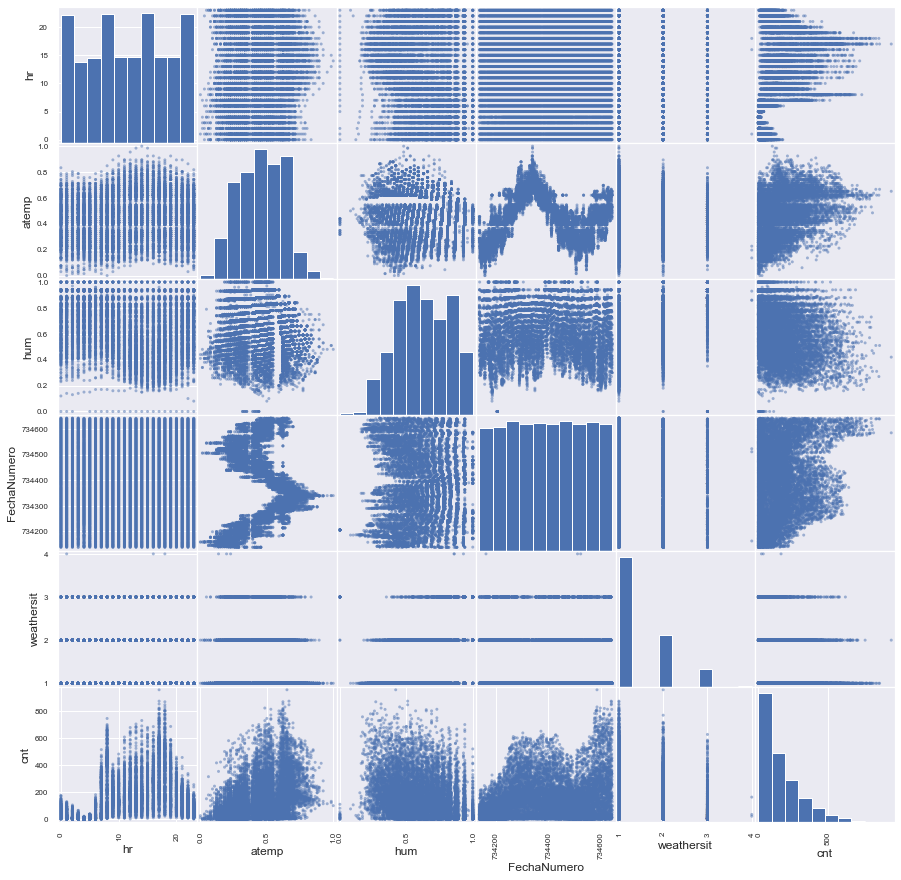

In [363]:
pd.plotting.scatter_matrix(datos[['hr','atemp', 'hum','FechaNumero','weathersit','cnt']],figsize = (15,15))
plt.show()

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [365]:
datos.columns

Index(['instant', 'dteday', 'FechaNumero', 'season', 'yr', 'mnth', 'hr',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [366]:
X_train = np.array(datos[['hr']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 19311.33777042172


138.96523943210303

In [367]:
X_train = np.array(datos[['hr','atemp']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 16583.91290940912


128.7785421155602

In [368]:
X_train = np.array(datos[['hr','atemp', 'hum']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 15474.34277856488


124.39591142222031

In [369]:
X_train = np.array(datos[['hr','atemp','FechaNumero']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 15493.617051420952


124.47335880187757

In [370]:
X_train = np.array(datos[['hr','atemp', 'hum','FechaNumero']])
y_train = np.array(datos[['cnt']])
modelo = LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)
modelo.coef_
from sklearn.metrics import mean_squared_error
y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 14420.861821818486


120.08689279775076

In [372]:
hora_max = datos.groupby('hr')['cnt'].mean().argmax()

In [374]:
datos.insert(6, 'similitud_hr_max',(hora_max-abs(datos['hr']-hora_max))/17)

In [376]:
corr = datos.corr()

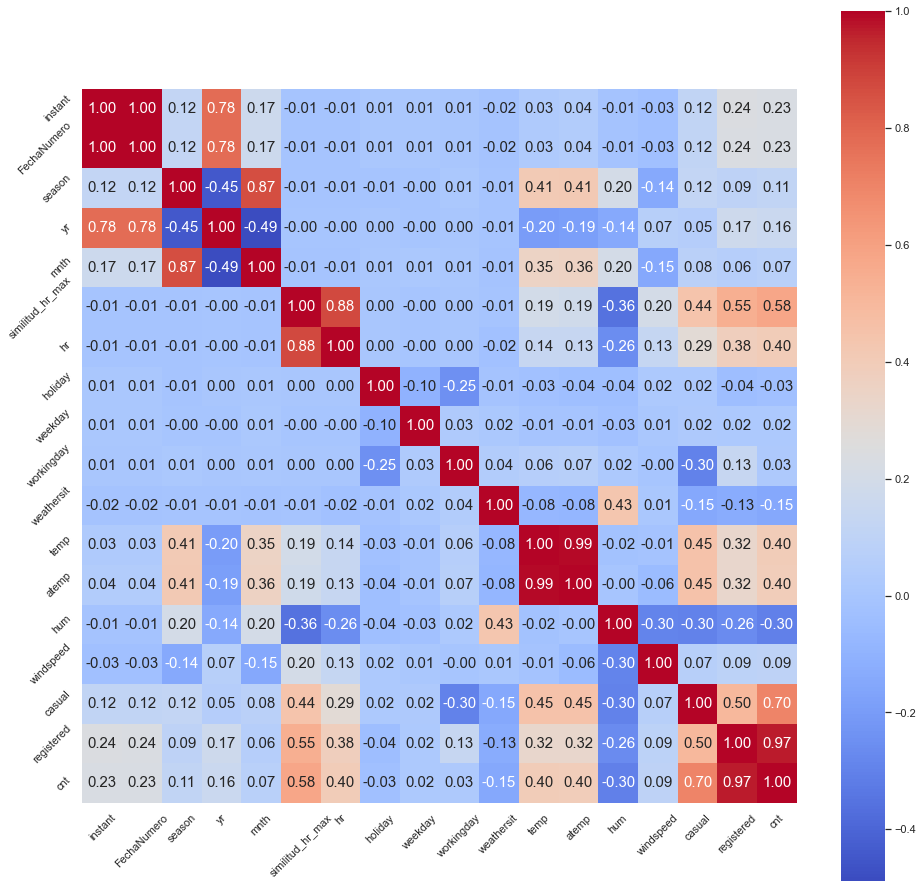

In [377]:
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [387]:
X = np.array(datos[['similitud_hr_max','atemp', 'hum','FechaNumero','weathersit']])
y = np.array(datos[['cnt']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45)

modelo = LinearRegression(fit_intercept=True)

modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train)
y_train_pred = y_train_pred.astype('int')

print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE

Error en datos de train: 11618.20904010197


107.7877963412462

In [389]:
y_train_pred

array([[5],
       [5],
       [5],
       ...,
       [5],
       [5],
       [0]])

In [381]:
datos_test = pd.read_excel('bike_test.xlsx')
datos_test.insert(2, 'FechaNumero',datos_test['dteday'].map(date.toordinal))

In [382]:
datos_test.insert(6, 'similitud_hr_max',hora_max-abs(datos['hr']-hora_max))

In [383]:
y_test_pred = modelo.predict(X_test)
y_test_pred
FernandoAleisy = pd.DataFrame()
FernandoAleisy['pred'] = pd.DataFrame(y_test_pred)
FernandoAleisy['pred'] = FernandoAleisy['pred'].astype('int')
FernandoAleisy.to_csv('FernandoAleisy.csv', index = False)